# Activity 5: Applying the basic idea of PageRank

## Web References

- [Visualisation of graphs](https://igraph.org/python/doc/tutorial/visualisation.html#graph-layouts)
- [igraph goes to the very edge of the bounding box](https://stackoverflow.com/questions/14504268/igraph-goes-to-the-very-edge-of-the-bounding-box)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import igraph as gp

## PageRank Class

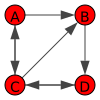

In [2]:
class PageRank:
    """
    Implement the PageRank algorithm using matrix manipulation.
    """
    def __init__(self, edges):
        """
        Create a dafault instance of the class.

        Args:
            edges: The edges to create the page graph from.
        """
        self.graph = self.createGraph(edges)

    def createGraph(self, edges):
        """
        Construct a graph from the page edges.

        Args:
            edges: The edges to create the page graph from.

        Returns:
            The graph created from the input edges.
        """
        return gp.Graph.TupleList(edges, directed=True)


    def plotGraph(self, width=300, height=300, margin=15, layout='auto', edge_curved=True):
        """
        Plot the page graph.
        """
        return gp.plot(self.graph, 
            vertex_label=self.graph.vs["name"], 
            layout=layout, 
            margin=margin, 
            bbox=(0, 0, width, height), 
            edge_curved=edge_curved)

    def get_transitionmatrix(self):
        """
        Get the transation matrix of the graph.

        Returns:
            A numpy array containing the transition matrix.
        """
        # initialize the transition matrix with zeros
        node_count = len(self.graph.vs)
        transition_matrix = np.zeros([node_count, node_count])

        # get the in and out adjacency list
        out_adj = self.graph.get_adjlist(mode='out')
        in_adj = self.graph.get_adjlist(mode='in')

        # calculate the transition matrix
        for i in range(node_count):
            for j in range(node_count):
                # if there is no link from j to i, then mij equals zero
                if i not in out_adj[j]:
                    transition_matrix[i][j] = 0
                else: # mij equals 1/k, if there's a link from page j to i. k is the total number of outgoing links from j
                    transition_matrix[i][j] = 1.0 /  len(out_adj[j])


        return transition_matrix

    def get_initial_vector(self):
        """
        Get the initial pagerank vector v0.
        """
        node_count = len(self.graph.vs)

        vector = np.empty(node_count)
        vector.fill(1/node_count)

        return vector

    def get_distribution(self, n):
        """
        Get the distribution after n steps.
        """
        M = self.get_transitionmatrix()
        v = self.get_initial_vector()

        for i in range(n):
            v = np.matmul(M, v)

        return v

"""test the pagerank class"""
# create the test edges
test_edges = [
    ['A', 'B'],
    ['A', 'C'],
    ['B', 'D'],
    ['C', 'A'],
    ['C', 'B'],
    ['C', 'D'],
    ['D', 'C']
]

pageRank = PageRank(test_edges)
pageRank.plotGraph(width=100, height=100, layout='grid', edge_curved=False)


In [3]:
print(pageRank.get_transitionmatrix())
print(pageRank.get_initial_vector())
print()
print(pageRank.get_distribution(1))
print(pageRank.get_distribution(2))
print(pageRank.get_distribution(3))

[[0.         0.         0.33333333 0.        ]
 [0.5        0.         0.33333333 0.        ]
 [0.5        0.         0.         1.        ]
 [0.         1.         0.33333333 0.        ]]
[0.25 0.25 0.25 0.25]

[0.08333333 0.20833333 0.375      0.33333333]
[0.125      0.16666667 0.375      0.33333333]
[0.125      0.1875     0.39583333 0.29166667]


## Markov process and limiting distribution

https://learning.edx.org/course/course-v1:AdelaideX+BigDataX+1T2021/block-v1:AdelaideX+BigDataX+1T2021+type@sequential+block@a490094f2471468ab0f8127434389d41/block-v1:AdelaideX+BigDataX+1T2021+type@vertical+block@8860c6e01ef441efafc577a75951d69f

In [4]:
def get_distribution(m, v,  n):
    """
    Get the distribution after n steps.
    """
    M = m
    v = v

    for i in range(n):
        v = np.matmul(M, v)

    return v

# test the function
m = np.array([
    [0, 1/3, 1/2, 1/2],
    [1,   0, 1/2,   0],
    [0, 1/3,   0, 1/2],
    [0, 1/3,   0,   0]
])

v= np.array([1/4, 1/4, 1/4, 1/4])

print(get_distribution(m, v, 0))
print(get_distribution(m, v, 1))
print(get_distribution(m, v, 2))
print(get_distribution(m, v, 3))

[0.25 0.25 0.25 0.25]
[0.33333333 0.375      0.20833333 0.08333333]
[0.27083333 0.4375     0.16666667 0.125     ]
[0.29166667 0.35416667 0.20833333 0.14583333]


## Linear Algebra – Introduction to PageRank
https://www.youtube.com/watch?v=F5fcEtqysGs

The iteration values in the video also seems different, but at least the first iteration is the same, and the next one to follow but in the wrong order.

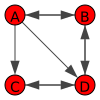

In [5]:
# initialize the grap
grap_edges = [
    ['A', 'B'],
    ['A', 'C'],
    ['A', 'D'],
    ['B', 'A'],
    ['B', 'D'],
    ['C', 'D'],
    ['D', 'C'],
    ['D', 'B']
]

pageRank = PageRank(grap_edges)
pageRank.plotGraph(width=100, height=100, layout='grid', edge_curved=False)

In [6]:
# get the transition matrix
pageRank.get_transitionmatrix()

array([[0.        , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.5       ],
       [0.33333333, 0.5       , 1.        , 0.        ]])

In [7]:
# show the initial vector
pageRank.get_initial_vector()

array([0.25, 0.25, 0.25, 0.25])

In [8]:
# show the values after one step
for steps in range(1,5):
    print(steps, pageRank.get_distribution(steps))

1 [0.125      0.20833333 0.20833333 0.45833333]
2 [0.10416667 0.27083333 0.27083333 0.35416667]
3 [0.13541667 0.21180556 0.21180556 0.44097222]
4 [0.10590278 0.265625   0.265625   0.36284722]


## Question 1 - 3

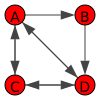

In [9]:
# initialize the grap
grap_edges = [
    ['A', 'B'],
    ['A', 'C'],
    ['A', 'D'],
    ['B', 'D'],
    ['C', 'A'],
    ['C', 'D'],
    ['D', 'A'],
    ['D', 'C']
]

pageRank = PageRank(grap_edges)
pageRank.plotGraph(width=100, height=100, layout='grid', edge_curved=False)

In [10]:
# get the transition matrix
print(pageRank.get_transitionmatrix())

# show the inital vector
print()
print(pageRank.get_initial_vector())

[[0.         0.         0.5        0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.         0.5       ]
 [0.33333333 1.         0.5        0.        ]]

[0.25 0.25 0.25 0.25]


## Question 4

In [11]:
print(np.sum(pageRank.get_transitionmatrix(), axis=0))

[1. 1. 1. 1.]


## Question 5

In [12]:
print(pageRank.get_initial_vector())

[0.25 0.25 0.25 0.25]


## Question 6

In [13]:
# get the pagerank vector after 1 step
vector = pageRank.get_distribution(1)
print(vector)
print(np.sum(vector))

[0.25       0.08333333 0.20833333 0.45833333]
1.0


## Question 7

In [14]:
steps = 3
for row in pageRank.get_distribution(steps): print(row)

0.29166666666666663
0.1111111111111111
0.24652777777777776
0.3506944444444444
